# Predicting Car Fuel Consumption

In this example we are going to create a regression model with Keras Tensorflow which aims to predict the efficiency of a fleet of cars.

The dataset can be found at:

[Auto MPG Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/)

We are going to put in practice some techniques to tackle this regresion problem, like "bucketizing" numerical features.

Also though it is a rather simple problem, we will apply some best practices in terms of choices for initialization, callbacks, hyperparameter tunning, optimizer, batch size, learning rate, dropout etc...


In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import seaborn as sns
from IPython.display import Image

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, StratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## Import Dataset

In [2]:
# The dataset can be read directly from the url, or if you do not have connection, from a local folder like ../data

#url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

path = '../data/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(path, names=column_names,
                 na_values = "?", comment='\t',
                 sep=" ", skipinitialspace=True)

df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete


## Dataset Preprocesssing

In [5]:
# Count NaN
print(df.isnull().sum())

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [7]:
# As there are only 6 null values we drop them in a new dataframe
df_clean = df.dropna().reset_index(drop=True)
df_clean.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## Feature Importance Calculation

In the following cells we calculate the influence of the input variables over the MPG (miles per gallon), which is the intended variable to be predicted.

The results are the same with both procedures.

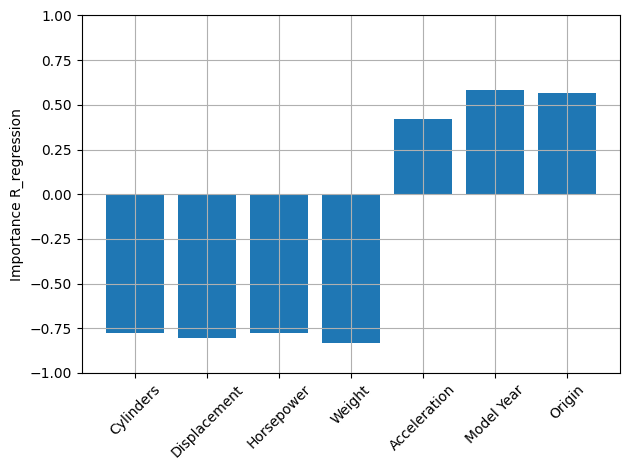

In [19]:
from sklearn.feature_selection import r_regression
X= df_clean.iloc[:,1:].values
y = df_clean.iloc[:,0].values
importances = r_regression(X, y, center=True, force_finite=True)

fig, ax = plt.subplots()
ax.bar(range(7), importances, align = 'center')
ax.set_ylabel('Importance R_regression')
ax.set_xticks(range(7))
ax.set_xticklabels(df_clean.columns[1:], rotation = 45)
plt.ylim([-1,1])
plt.tight_layout()
plt.grid(True)
plt.show()

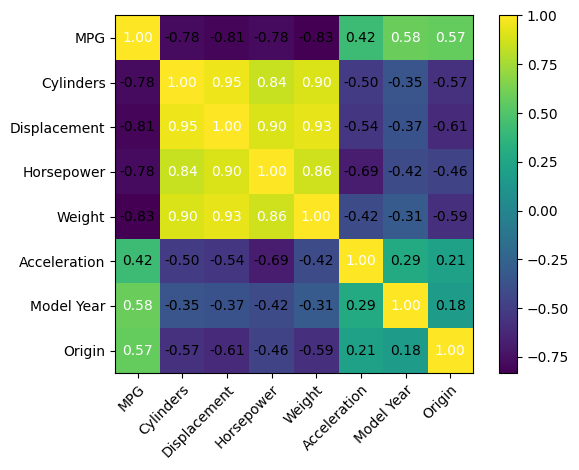

In [16]:
from mlxtend.plotting import heatmap

cm = np.corrcoef(df_clean.values.T)
hm = heatmap(cm, row_names = df_clean.columns, column_names = df_clean.columns)
plt.tight_layout()
plt.show()

## Model Creation

## Model Evaluation

## Model Optimization 

## Run Optimized Model

## Save Basic and Optimized Model